## RBFNN Lab

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from naoc.rbfnn import RBFNN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Offline training


Epoch 1/100

2/2 [==============================] - 1s 7ms/step - loss: 0.5488
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 0.5397
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5340
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5345
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5328
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5315
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.5306
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5278
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5248
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5185
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5094
Epoch 12/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4978
Epoch 13/100
2/2 [==============================] - 0s 2ms/s

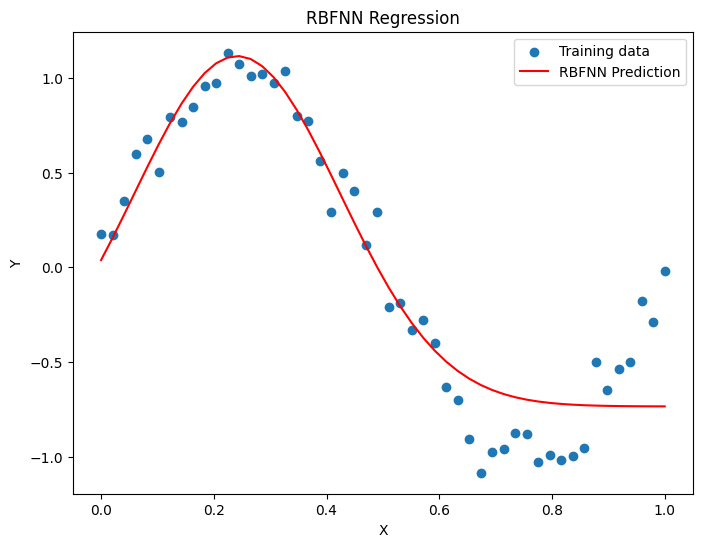

In [2]:
datapoints = 50
# Generating sample data for regression
np.random.seed(0)
x_train = np.linspace(0, 1, datapoints)
y_train = np.sin(2 * np.pi * x_train)  + np.random.normal(0, 0.1, datapoints)

# Reshape data for compatibility with the model
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Creating an instance of the RBFNN model
model = RBFNN(rbf_units=10, output_units=1)

# Training the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Generating predictions using the trained model
x_test = np.linspace(0, 1, datapoints).reshape(-1, 1)
y_pred = model.predict(x_test)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_test, y_pred, color='red', label='RBFNN Prediction')
plt.title('RBFNN Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


#### Online training

Epoch 1/100: loss 1
Epoch 2/100: loss 0.8386223316192627
Epoch 3/100: loss 0.8394920229911804
Epoch 4/100: loss 0.8402601480484009
Epoch 5/100: loss 0.8404227495193481
Epoch 6/100: loss 0.8405098915100098
Epoch 7/100: loss 0.8401473164558411
Epoch 8/100: loss 0.8395206332206726
Epoch 9/100: loss 0.8386139869689941
Epoch 10/100: loss 0.8372243642807007
Epoch 11/100: loss 0.8352444171905518
Epoch 12/100: loss 0.8321940898895264
Epoch 13/100: loss 0.8273580074310303
Epoch 14/100: loss 0.8192837238311768
Epoch 15/100: loss 0.8061345815658569
Epoch 16/100: loss 0.785167932510376
Epoch 17/100: loss 0.7533213496208191
Epoch 18/100: loss 0.7084816694259644
Epoch 19/100: loss 0.651497483253479
Epoch 20/100: loss 0.5856426954269409
Epoch 21/100: loss 0.5159922242164612
Epoch 22/100: loss 0.4468929171562195
Epoch 23/100: loss 0.3817480206489563
Epoch 24/100: loss 0.32281196117401123
Epoch 25/100: loss 0.27143776416778564
Epoch 26/100: loss 0.22908028960227966
Epoch 27/100: loss 0.1949539780616760

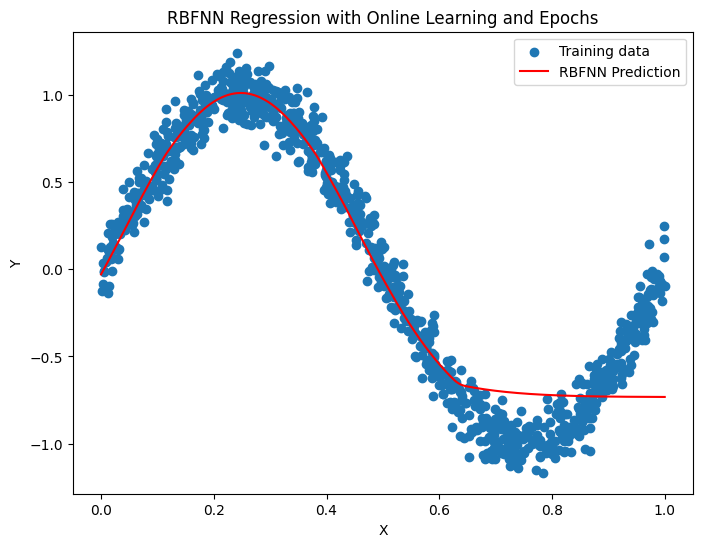

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic data
def generate_data(n_samples=1000):
    x = np.random.rand(n_samples, 1)
    y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, (n_samples, 1))
    return x, y

# Generate synthetic data
x_train, y_train = generate_data()

# Creating an instance of the RBFNN model
model = RBFNN(rbf_units=10, output_units=1, hidden_layers=[32])

# Hyperparameters
batch_size = 32
learning_rate = 0.01
epochs = 100  # Define the number of epochs
loss = 1
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}: loss {loss}")
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        loss = model.update_weights(x_batch, y_batch)
    

# Generating predictions using the trained model
x_test = np.linspace(0, 1, 1000).reshape(-1, 1)
y_pred = model.predict(x_test)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_test, y_pred, color='red', label='RBFNN Prediction')
plt.title('RBFNN Regression with Online Learning and Epochs')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [8]:
model.predict(np.asarray([1.0]).reshape(-1, 1))

1/1 [==============================] - 0s 14ms/step


array([[-0.732512]], dtype=float32)